In [ ]:
# Jeffery Smith

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

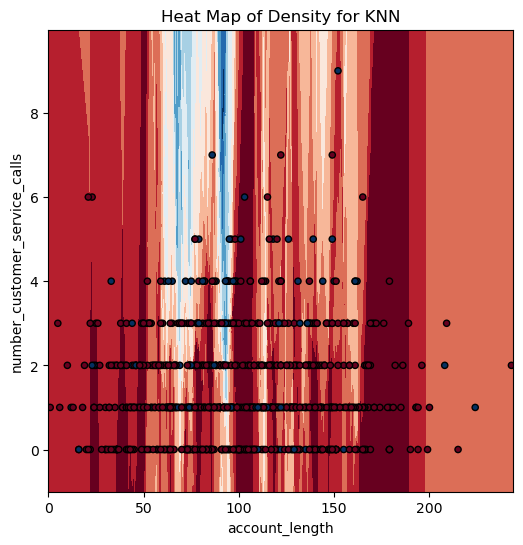

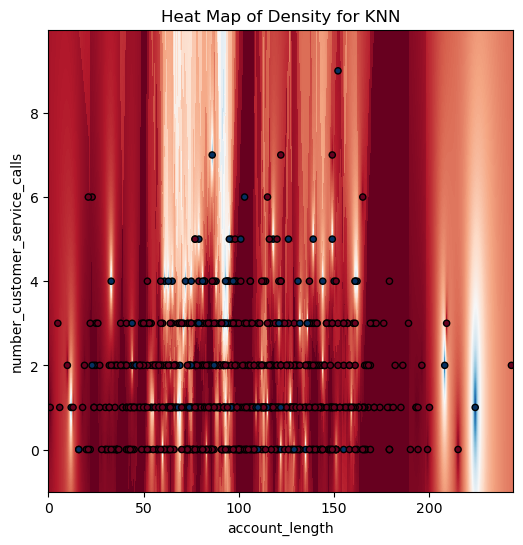

In [3]:

# Anaconda Assistant for code Refraction

def classify_and_plot(X, y, n_neighbors=15, h=.02, feature_names=None):
    # Create color maps
    cmap = plt.cm.RdBu
    
    # Create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    plt.rcParams['figure.figsize'] = 6, 6
    for weights in ['uniform', 'distance']:
        
        # we create an instance of Neighbours Classifier and fit the data.
        regr = KNeighborsRegressor(n_neighbors, weights=weights)
        regr.fit(X_train, y_train)

        # Plot the decision boundary.
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = regr.predict(np.c_[xx.ravel(), yy.ravel()])

        # The result in a color plot
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)   
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("Heat Map of Density for KNN")
        
        # Add axis labels 
        if feature_names and len(feature_names) >= 2:
            plt.xlabel(feature_names[0])
            plt.ylabel(feature_names[1])

# load your data 
data = pd.read_csv('train.csv')

# Encode churn column as binary
data["churn_encoded"] = data["churn"].map({"no": 0, "yes": 1})

names = list(data.columns)

# Column "account_length" and "number_customer_service_calls" 
# we only take the best two features and prepare them for the KNN classifier
rows_nbr = 850 # data.shape[0]
feature_indices = [1, 18]  # Account_length and number_customer_service_calls
X_prime = np.array(data.iloc[:rows_nbr, [1,18]])
X = X_prime # preprocessing.scale(X_prime)
y = np.array(data.iloc[:rows_nbr, 20])

# Get the feature names for the axes labels
feature_names = [names[i] for i in feature_indices]

# Classify, evaluate and plot results with labeled axes
classify_and_plot(X, y, feature_names=feature_names)

Using 850 data points with k=5 nearest neighbor, the dataframe shows the density of accounts measured by churn rate at a range of 0 - 10 calls. 

Blue=no, Red=yes